<a href="https://colab.research.google.com/github/omgucer/Projects/blob/main/Sequential_Dense_NN_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install tensorflow

In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

fashion_dataset = keras.datasets.fashion_mnist #load a dataset from keras 

(train_images,train_labels),(test_images,test_labels) = fashion_dataset.load_data()

class_names= ['t-shirt','trouser','pullover','dress','coat','sandal','shirt','sneaker','bag','ankle boot']

train_images = train_images/255.0
test_images =test_images/255.0


4423680/4422102 [==============================] - 0s 0us/step


In [8]:
#We define a full conected  Neural Network with a input layer, a hidden layer, and an output layer

model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)), #Input layer
                          keras.layers.Dense(128,activation = 'relu'), #Hidden layer
                          keras.layers.Dense(10, activation = 'softmax') #Output layer
])

model.compile(optimizer ='adam',
              loss= 'sparse_categorical_crossentropy',
              metrics= ['accuracy'])
model.fit(train_images,train_labels, epochs = 3)



Epoch 1/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4965 - accuracy: 0.8244
Epoch 2/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3731 - accuracy: 0.8660
Epoch 3/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3357 - accuracy: 0.8781


In [9]:
test_loss, test_accuracy = model.evaluate(test_images,test_labels, verbose=1)
print('Test accuracy',test_accuracy)
print('Test loss', test_loss)

313/313 [==============================] - 0s 1ms/step - loss: 0.3652 - accuracy: 0.8681
Test accuracy 0.8680999875068665
Test loss 0.3651691675186157


In [16]:
predictions = model.predict(test_images)
print(predictions)

[[4.32502929e-05 3.05147569e-06 3.37257097e-06 ... 7.69831240e-02
  5.93694509e-04 8.57065916e-01]
 [4.68759645e-05 1.25853450e-09 9.96540964e-01 ... 1.80080655e-11
  5.16257757e-08 4.16297964e-13]
 [1.12316839e-05 9.99977589e-01 1.29975763e-06 ... 7.14543216e-11
  4.32174581e-08 1.28037901e-12]
 ...
 [7.03554309e-04 1.94227269e-07 3.26897157e-03 ... 3.54156305e-06
  9.89134252e-01 3.86091233e-06]
 [4.51277998e-07 9.99869347e-01 5.03441868e-07 ... 5.71254724e-08
  1.11110765e-07 3.18127206e-07]
 [7.82595365e-04 1.83302400e-05 7.02310528e-04 ... 3.63656878e-02
  6.84181368e-03 2.92816549e-04]]


pullover


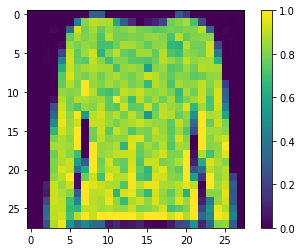

In [24]:
print(class_names[np.argmax(predictions[89])])
plt.figure()
plt.imshow(test_images[89])
plt.colorbar()
plt.grid(False)
plt.show()